In [17]:
import matplotlib.pyplot as plt #para graficar informacion
import pandas as pd #para manejo de datos
import os
import threading #para ejecutar por segundo
from itertools import zip_longest #para crear df teniendo listas vacias


class MRUV:
    #constructor
    def __init__(self,name,posicion_final=0,acceleration=0,velocidad_inicial=0,velocidad_final=0,tiempo=0):
      
      self.velocidad_inicial=velocidad_inicial
      self.tiempo=tiempo
      self.acceleration=acceleration
      self.velocidad_final=velocidad_final
      self.posicion_incial=0
      self.posicion_final=posicion_final
      self.list_tiempo=[]
      self.list_acceleration=[]
      self.list_posicion=[]
      self.list_velocidad=[]
      self.df_datos=pd.DataFrame()
      self.name=name

    #creamos las funciones para el objeto como acelerar y desacelerar que afectan a la velocidad

    def acelerar(self,acelerar):
      self.acceleration=float(self.acceleration)+float(acelerar)
      return self.acceleration

    #creamos funciones de las formulas de mruv 
    def frm_acceleration(self):
      #a = (v - v₀) / t  --Formula que nos indican
      if self.tiempo!=0:
        self.acceleration=str((self.velocidad_final-self.velocidad_inicial)/self.tiempo)
      if self.tiempo==0:
        self.acceleration=str((self.velocidad_final-self.velocidad_inicial))+"|"+str("Sin tiempo")
      return self.acceleration


    def frm_velocidad_final(self):
      #v = v₀ + at
      self.velocidad_final=(self.velocidad_inicial+(self.acceleration*self.tiempo))
      return self.velocidad_final


    def frm_posicion(self):
      #x = x₀ + v₀t + (1/2)at²
      self.posicion=self.posicion_incial+(self.velocidad_inicial*self.tiempo)+((1/2) * (self.acceleration) * (self.tiempo ** 2))
      return self.posicion


    def frm_tiempo(self):
      #t = (v - v₀) / a
      self.tiempo=(self.velocidad_final-self.velocidad_inicial)/self.acceleration
      return self.tiempo


    def frm_velocidad_cuadrado(self):
      #v² = v₀² + 2a(x - x₀)
      self.velocidad_cuadrado=(self.velocidad_inicial**2) + (2 * self.acceleration * (self.posicion_final - self.posicion_incial))
      return self.velocidad_cuadrado


    #formular para poder obtener datos de  otros calculos
    def calcular_velocidad_final(self):
      
      self.velocidad_final = self.velocidad_cuadrado**(1/2)   
      return self.velocidad_final

    #otras funciones 
    def funcion_print_por_segundo(self):   
      for i in range(self.tiempo):
          t = threading.Timer(1.0*i)
          t.start()

    def print(self):
      print('velocidad_inicial:',self.velocidad_inicial)
      print('tiempo:',self.tiempo)
      print('acceleration:',self.acceleration)
      print('velocidad_final:',self.velocidad_final)
      print('posicion_incial:',self.posicion_incial)
      print('posicion_final:',self.posicion_final)

#'''GUARDAMOS LA INFORMACION PARA LUEGO PODER UTILIZARLOS EN DATOS Y OTROS GRAFICOS'''

    #guardamos la info para no perderla
    def crear_archivo(self):
      archivo=self.name+'.xlsx'
      self.df_datos.to_excel(archivo,sheet_name="Hoja 1",index=False)
      print(self.df_datos)
      return self.df_datos
    

    def unir_datos(self):
      # archivo=self.name+'.xlsx'
      # #busco primero si existe el archivo para solo agregar la info
      # df_archivo=pd.read_excel(archivo)
      # print(df_archivo)
      #usamos un dataframe para crear una tabla , como sip_longest evitamos un error que pueda truncarnos el proceso
      self.df_datos = pd.DataFrame(list(zip_longest(self.list_tiempo, self.list_posicion, self.list_acceleration,self.list_velocidad)), columns=['Tiempo', 'distancia', 'acceleration','velocidad'])
      self.df_datos['objeto']=self.name
      self.df_datos['objetodistancia']=''

      return self.df_datos

    def listar_tiempo(self):
      #tiempo calcular para graficar
      tiempo=self.tiempo
      self.list_tiempo=[]
      for i in range(1, int(tiempo) + 1):
        self.list_tiempo.append(i)

      return self.list_tiempo
    

    def guardar_datos_velocidad(self):

      velocidad_inicial=self.velocidad_inicial  
      acceleration=self.acceleration

      #tiempo calcular para graficar
      self.list_velocidad=[]
      for second in self.list_tiempo:
        calculo=float(velocidad_inicial)+(float(acceleration)*second)
        self.list_velocidad.append(calculo)
      
      #v = v₀ + at
      print(self.list_tiempo)
      print(self.list_velocidad)
      
      return self.list_velocidad
    

    def guardar_datos_distancia(self):
      if self.posicion_final!=0:
        posicion_inicial=float(self.posicion_incial)
        velocidad_inicial=float(self.velocidad_inicial)
        acceleration=float(self.acceleration)

        #tiempo calcular para graficar
        self.list_posicion=[]
        for second in self.list_tiempo:
          calculo=posicion_inicial+(velocidad_inicial*second)+((1/2) * (acceleration) * (second ** 2))
          self.list_posicion.append(calculo)
        
        #v = v₀ + at
        print(self.list_tiempo)
        print(self.list_posicion)
      else:
        self.list_posicion=[]
        
      return self.list_posicion
  

    def guardar_datos_aceleracion(self):

      velocidad_final=float(self.velocidad_final)
      velocidad_inicial=float(self.velocidad_inicial)

      #a = (v - v₀) / t  --Formula que nos indican
      if self.tiempo!=0:

        self.list_acceleration=[]
        for second in self.list_tiempo:
          calculo=(velocidad_final-velocidad_inicial)/second
          self.list_acceleration.append(calculo)
      
      else:
        self.list_acceleration=[]
      #v = v₀ + at
      print(self.list_tiempo)
      print(self.list_acceleration)
      
      return self.list_acceleration


    def actualizar_variables(self):
      self.velocidad_inicial=self.velocidad_final
      self.posicion_incial=self.posicion_final
      self.tiempo=0


#''''GRAFICAMOS LA INFO QUE TENEMOS ''''

    #ejecutamos una funcion para poder graficar lo que se tiene
    def graficar_velocidad(self):
      plt.figure(figsize=(15,6))#para el tamaño
      plt.plot(self.list_tiempo,self.list_velocidad,marker='o',linestyle='--',color='g')
      plt.xticks(self.list_tiempo)
      plt.yticks(self.list_velocidad)
      plt.xlabel('Tiempo')#para dar nombre al grafico
      plt.ylabel('Velocidad')#para dar nombre al grafico

    def graficar_distancia(self):
      plt.figure(figsize=(15,6))#para el tamaño
      plt.plot(self.list_tiempo,self.list_posicion,marker='o',linestyle='--',color='g')
      plt.xticks(self.list_tiempo)
      plt.yticks(self.list_posicion)  
      plt.xlabel('Tiempo')#para dar nombre al grafico
      plt.ylabel('Posicion')#para dar nombre al grafico

    def graficar_aceleracion(self):
      plt.figure(figsize=(15,6))#para el tamaño
      plt.plot(self.list_tiempo,self.list_acceleration,marker='o',linestyle='--',color='g')
      plt.xticks(self.list_tiempo)
      plt.yticks(self.list_acceleration)  
      plt.xlabel('Tiempo')#para dar nombre al grafico
      plt.ylabel('Aceleracion')#para dar nombre al grafico

In [11]:
#agregar try a las funciones para que pueda correr sin problema

In [18]:
#problema
#Supongamos que un automóvil viaja a una velocidad de 30 m/s y frena bruscamente, 
#reduciendo su velocidad a 10 m/s en un tiempo de 4 segundos. Queremos determinar la aceleración negativa experimentada durante el frenado.


carrito1=MRUV(velocidad_inicial=30,velocidad_final=10,tiempo=4,name='Carrito1')
carrito1.frm_acceleration()
carrito1.print()
carrito1.listar_tiempo()
carrito1.guardar_datos_velocidad()
carrito1.guardar_datos_distancia()
carrito1.guardar_datos_aceleracion()
# carrito1.print()
# carrito1.graficar_velocidad()
# carrito1.graficar_distancia()
# carrito1.graficar_aceleracion()
carrito1.unir_datos()
carrito1.crear_archivo()
carrito1.unir_datos()

velocidad_inicial: 30
tiempo: 4
acceleration: -5.0
velocidad_final: 10
posicion_incial: 0
posicion_final: 0
[1, 2, 3, 4]
[25.0, 20.0, 15.0, 10.0]
[1, 2, 3, 4]
[-20.0, -10.0, -6.666666666666667, -5.0]
   Tiempo distancia  acceleration  velocidad    objeto objetodistancia
0       1      None    -20.000000       25.0  Carrito1                
1       2      None    -10.000000       20.0  Carrito1                
2       3      None     -6.666667       15.0  Carrito1                
3       4      None     -5.000000       10.0  Carrito1                


,Tiempo,distancia,acceleration,velocidad,objeto,objetodistancia
0,1,None,-20.000000,25.0,Carrito1,
1,2,None,-10.000000,20.0,Carrito1,
2,3,None,-6.666667,15.0,Carrito1,
3,4,None,-5.000000,10.0,Carrito1,


ValueError: x and y must have same first dimension, but have shapes (4,) and (0,)

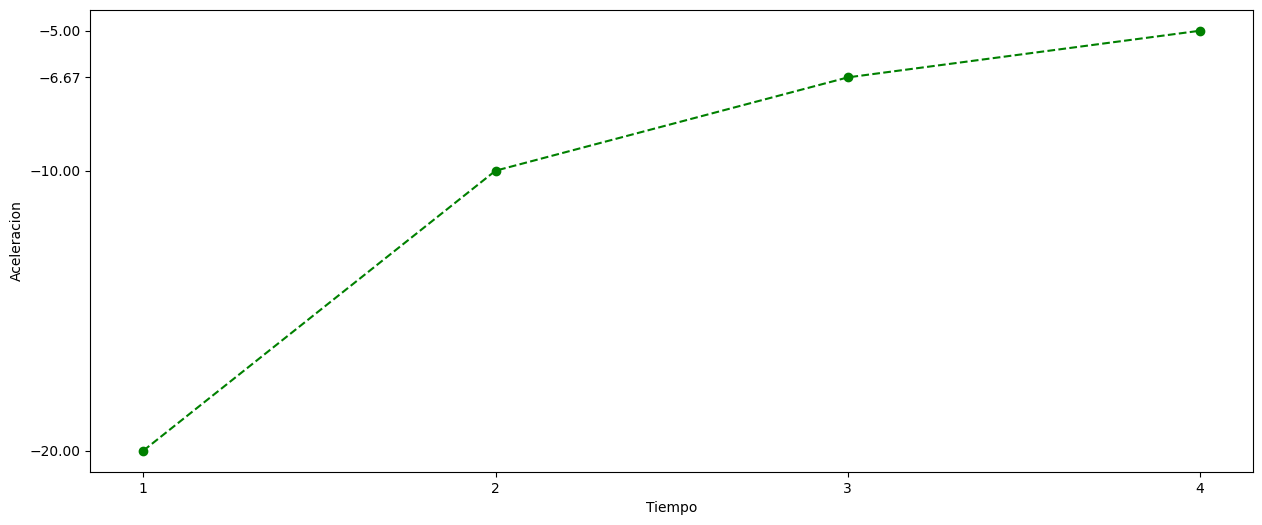

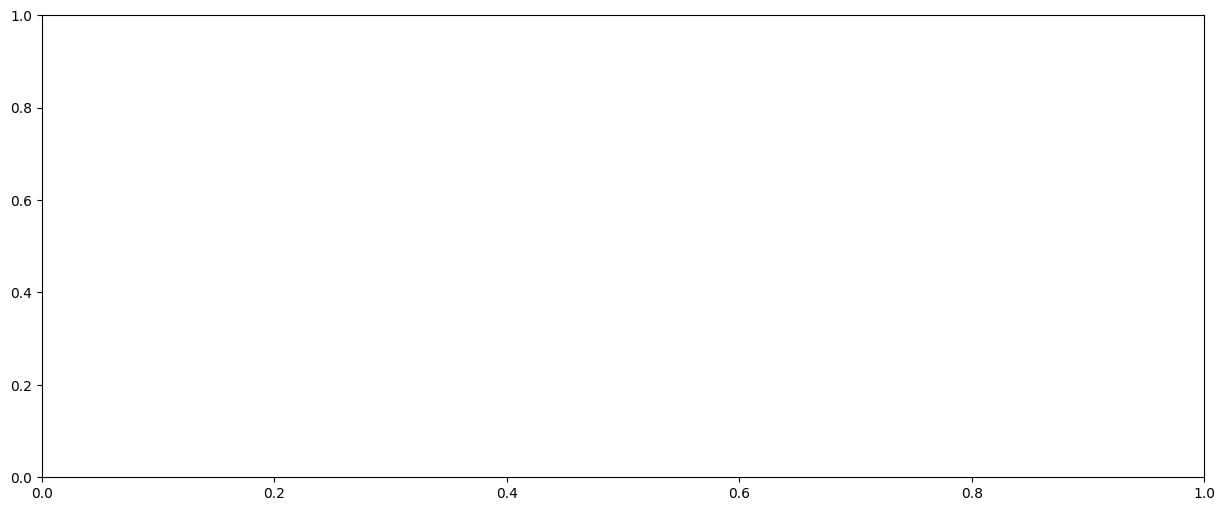

In [8]:
carrito1.graficar_aceleracion()
carrito1.graficar_distancia()

In [98]:
#tiempo calcular para graficar
tiempo=4
list_tiempo=[]
for i in range(1, int(tiempo) + 1):
       list_tiempo.append(i)
       list_tiempo.append(tiempo)

velocidad_inicial=30
acceleration=-5.0
#tiempo calcular para graficar
list_velocidad=[]
for i in list_tiempo:
        calculo=velocidad_inicial+(acceleration*i)
        list_velocidad.append(calculo)

print(list_tiempo)
print(list_velocidad)
      

[1, 4, 2, 4, 3, 4, 4, 4]
[25.0, 10.0, 20.0, 10.0, 15.0, 10.0, 10.0, 10.0]


Hola, mundo!


Hola, mundo!
Hola, mundo!
Hola, mundo!
Hola, mundo!
Hola, mundo!
Hola, mundo!
Hola, mundo!
Hola, mundo!
Hola, mundo!


In [66]:
columnas=['objeto','tiempo','distancia',	'acceleration'	,'velocidad','objeto_distancia']
filas={'objeto':'uno','tiempo':1,'distancia':20,'acceleration':32,'velocidad':39,'objeto_distancia':0}
df_datos=pd.DataFrame(columns=columnas)   
df_datos=df_datos.append(filas,ignore_index=True)

df_datos

C:\Users\J_lozada\AppData\Local\Temp\ipykernel_16692\1534550063.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_datos=df_datos.append(filas,ignore_index=True)


,objeto,tiempo,distancia,acceleration,velocidad,objeto_distancia
0,uno,1,20,32,39,0


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 17.912878474779202]
[12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 45.825756949558404]
La velocidad final es: 45.83 m/s  y chocará en un tiempo de 17.91 segundos debe acelerar  -2.558257569495584 para poder llegar sin complicaciones


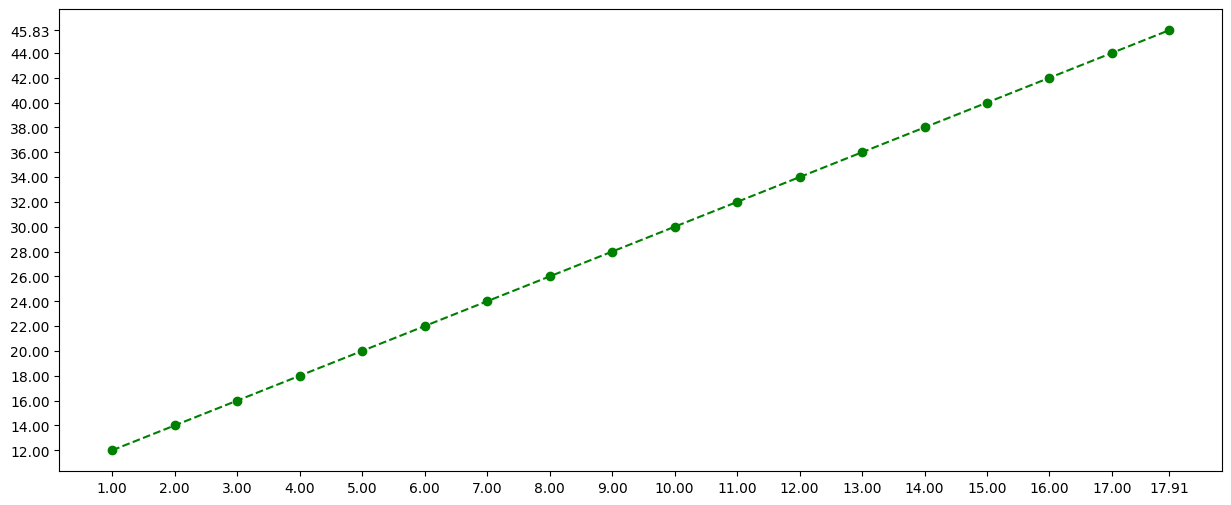

In [92]:
#ejecutando programa para validar

objeto=MRUV(posicion_final=500,velocidad_inicial=10,acceleration=2)
objeto.frm_velocidad_cuadrado()
v_final=objeto.calcular_velocidad_final()
t_final=objeto.frm_tiempo()
objeto.guardar_datos()
objeto.graficar()
objeto.reducir_velocidad(0)
a_final=objeto.frm_acceleration()
#primer test correcto 
#calculadno la velocidad con la que chocará y su tiempo
print('La velocidad final es:',round(v_final,2),'m/s  y chocará en un tiempo de',round(t_final,2),'segundos debe acelerar ' ,a_final,'para poder llegar sin complicaciones') 


In [78]:
objeto.print()

AttributeError: 'MRUV' object has no attribute 'distancia'